#### Input

In [55]:
%load_ext autoreload
%matplotlib inline
%load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [56]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

from helpers import helpplots as plothelp
from helpers import helpfunction as helper
from helpers import plot_dicts

<IPython.core.display.Javascript object>

In [3]:
%autoreload

<IPython.core.display.Javascript object>

### Constants

In [4]:
run = 3
input_dir = "./input/14Oct/run{}/".format(run)
output_dir = "./output/run{}/".format(run)

<IPython.core.display.Javascript object>

In [5]:
%%time
data = pickle.load(open(input_dir+"samples.pckl", 'rb'))
samples = list(data.keys())

CPU times: user 245 ms, sys: 530 ms, total: 775 ms
Wall time: 1.59 s


<IPython.core.display.Javascript object>

In [6]:
nue_frame = data["NUE"]["daughters"]
nue_mc = data["NUE"]["mc"]
nue_frame.rename(columns={"selected": "preselection_roberto"}, inplace=True)

<IPython.core.display.Javascript object>

In [7]:
title_str = "MicroBooNE Run{}: {:.1e} POT".format(run, data["On"]["POT"])

<IPython.core.display.Javascript object>

### Evaluation

In [8]:
q_s = "(select & e_candidate)"

<IPython.core.display.Javascript object>

In [9]:
print(nue_frame.query(q_s)["category"].value_counts())
print()
print(nue_frame.query(q_s)["interaction"].value_counts())

11    18395
1      7662
10     2838
6       984
5       237
4        13
Name: category, dtype: int64

0     14630
1      9081
10     3826
2      2513
3        79
Name: interaction, dtype: int64


<IPython.core.display.Javascript object>

In [10]:
print(pd.Series(nue_mc["category"]).value_counts())
print()
print(pd.Series(nue_mc["interaction"]).value_counts())

11    55985
1     45181
0     38795
5     25760
10    11944
4      7355
6      6230
3        32
31       20
dtype: int64

0     73741
1     69669
2     27491
10    19754
3       647
dtype: int64


<IPython.core.display.Javascript object>

### Plots

#### Signal sample plots

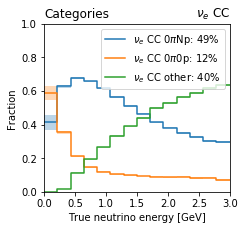

<IPython.core.display.Javascript object>

In [11]:
cats = {2: 11, 1: 10, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat in cats.keys():
    den = nue_mc[field][data["NUE"]["nueccinc"] == True]
    num = nue_mc[field][data["NUE"]["truth_cat"] == cat]

    den_w = nue_mc["weightSpline"][data["NUE"]["nueccinc"] == True]
    num_w = nue_mc["weightSpline"][data["NUE"]["truth_cat"] == cat]

    eff, unc_low, unc_up, edges = plothelp.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0:<13}: {1:.0f}%".format(
            plot_dicts.category_labels[cats[cat]], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Categories", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_cat.pdf", bbox_inches="tight")

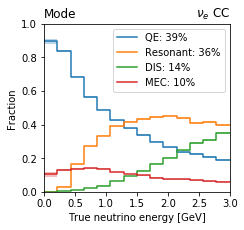

<IPython.core.display.Javascript object>

In [12]:
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat in cats:
    den = nue_mc[field]
    num = nue_mc[field][nue_mc["interaction"] == cat]

    den_w = nue_mc["weightSpline"]
    num_w = nue_mc["weightSpline"][nue_mc["interaction"] == cat]

    eff, unc_low, unc_up, edges = plothelp.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0}: {1:.0f}%".format(
            plot_dicts.int_labels[cat], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Mode", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_int.pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:61: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.1%
Purity: 1.9%
Purity: 43.9%


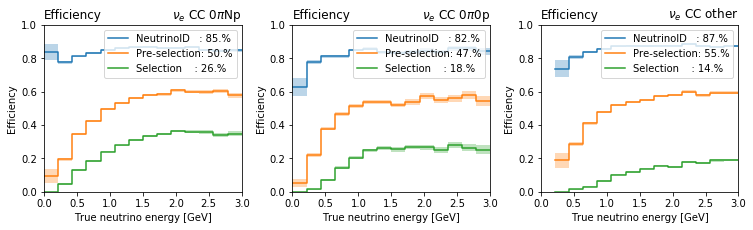

<IPython.core.display.Javascript object>

In [13]:
# eff per cat
cats = {2: 11, 1: 10, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = [
    "n_pfps>0 & daughter==0",
    "e_candidate & preselect",
    "e_candidate & select",
]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]
fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3.3))

for cat, ax in zip(cats.keys(), axes):
    for selector, lab in zip(selectors, labs):
        num = nue_frame.query(selector).query("truth_cat==@cat")[field]
        den = nue_mc[field][data["NUE"]["truth_cat"] == cat]

        num_w = nue_frame.query(selector).query("truth_cat==@cat")["weightSpline"]
        den_w = nue_mc["weightSpline"][data["NUE"]["truth_cat"] == cat]

        eff, unc_low, unc_up, edges = plothelp.efficiency_post(
            num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
        )
        ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
        ax.step(
            edges,
            eff,
            where="post",
            label="{0:<13}: {1:#.2g}%".format(lab, sum(num_w) / sum(den_w) * 100),
        )
    ax.set_title(plot_dicts.category_labels[cats[cat]], loc="right")
    ax.set_title("Efficiency", loc="left")
    ax.set_xlabel("True neutrino energy [GeV]")
    ax.set_ylabel("Efficiency")
    ax.set_ylim(0, 1)
    ax.set_xlim(x_min, x_max)
    ax.legend(loc="upper right")

fig.tight_layout()

for selector in selectors:
    print(
        "Purity: {:.1f}%".format(
            100 * plothelp.get_purity(data, selector, cats.values())
        )
    )
fig.savefig(output_dir + "efficiency_cat.pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:61: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


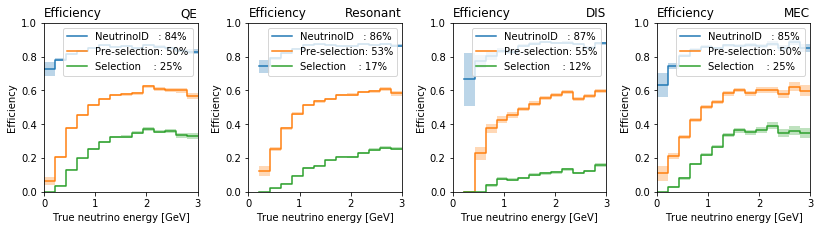

<IPython.core.display.Javascript object>

In [14]:
# eff per mode
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = [
    "n_pfps>0 & daughter==0",
    "e_candidate & preselect",
    "e_candidate & select",
]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]
fig, axes = plt.subplots(ncols=4, figsize=(11.5, 3.3))

for cat, ax in zip(cats, axes):
    for selector, lab in zip(selectors, labs):
        num = nue_frame.query(selector).query("interaction==@cat & nueccinc")[field]
        den = nue_mc[field][
            (nue_mc["interaction"] == cat) & data["NUE"]["nueccinc"] == 1
        ]

        num_w = nue_frame.query(selector).query("interaction==@cat & nueccinc")[
            "weightSpline"
        ]
        den_w = nue_mc["weightSpline"][
            (nue_mc["interaction"] == cat) & data["NUE"]["nueccinc"] == 1
        ]

        eff, unc_low, unc_up, edges = plothelp.efficiency_post(
            num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
        )
        ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
        ax.step(
            edges,
            eff,
            where="post",
            label="{0:<13}: {1:.0f}%".format(lab, sum(num_w) / sum(den_w) * 100),
        )
    ax.set_title(plot_dicts.int_labels[cat], loc="right")
    ax.set_title("Efficiency", loc="left")
    ax.set_xlabel("True neutrino energy [GeV]")
    ax.set_ylabel("Efficiency")
    ax.set_ylim(0, 1)
    ax.set_xlim(x_min, x_max)
    ax.legend(loc="upper right")

fig.tight_layout()
fig.savefig(output_dir + "efficiency_int.pdf", bbox_inches="tight")

#### Nicolo Significance

In [63]:
def test_statistics_distribution_given_numbers(
    binning,
    expected_number,
    systematic_uncertainties={"nue": 0, "numu": 0, "dataext": 0, "dirt": 0},
    data_on=False,
    n_toy=10000,
    log=False,
):
    gauss = st.norm(0, 1)
    one_side_sig_percent = gauss.cdf(1) * 100

    systematic_uncertainties["nue_signal"] = systematic_uncertainties["nue"]
    systematic_uncertainties["nue_nonsignal"] = systematic_uncertainties["nue"]

    print(
        expected_number["nue"],
        expected_number["nue_signal"],
        expected_number["nue_nonsignal"],
    )

    mean_toy = {}
    poisson_toy = {}

    for sample in expected_number.keys():
        if sample == "data":
            continue

        mean_toy[sample] = np.random.normal(
            expected_number[sample],
            expected_number[sample] * systematic_uncertainties[sample],
            n_toy,
        )
        poisson_toy[sample] = np.random.poisson(mean_toy[sample])

    bkg_toy = (
        poisson_toy["numu"]
        + poisson_toy["dirt"]
        + poisson_toy["dataext"]
        + poisson_toy["nue_nonsignal"]
    )
    bkg_plus_signal_toy = bkg_toy + poisson_toy["nue_signal"]

    fig, ax = plt.subplots()
    bin_contents_total, bin_edges, _ = ax.hist(
        [bkg_plus_signal_toy, bkg_toy],
        bins=binning[0],
        range=(binning[1], binning[2]),
        density=True,
        label=["signal + background", "background only"],
        alpha=0.7,
        histtype="stepfilled",
        lw=2,
        log=log,
    )

    bin_width = (binning[2] - binning[1]) / binning[0]
    ax.set_ylabel("Probability / {:.2f}".format(bin_width))
    ax.set_xlabel("Test statistics = number of selected events")
    ymin, ymax = ax.get_ylim()

    # add expected pvalues
    percentage_values = [16, 50, 84]
    heights = {16: 0.5, 50: 0.7, 84: 0.5}
    horizontalalignments = {16: "right", 50: "center", 84: "left"}
    position_offset = {16: +10, 50: 0, 84: -10}
    expected_quantiles = np.percentile(bkg_plus_signal_toy, percentage_values)
    expected_pvalues = []
    expected_one_minus_pvalues = []
    expected_significance = []

    for percentage_value, quantile in zip(percentage_values, expected_quantiles):
        one_minus_pvalue = np.less(bkg_toy, quantile).sum() / n_toy
        pvalue = 1.0 - one_minus_pvalue
        significance = float(gauss.ppf(one_minus_pvalue))
        expected_one_minus_pvalues.append(one_minus_pvalue)
        expected_pvalues.append(pvalue)
        expected_significance.append(significance)

        plt.axvline(
            quantile,
            ymax=heights[percentage_value] - 0.1,
            color="red",
            linestyle="--",
            label="expected {}%".format(percentage_value),
        )
        plt.text(
            quantile + position_offset[percentage_value],
            heights[percentage_value] * ymax,
            "p = {:.1e}\nZ = {:.2f}".format(pvalue, significance) + r"$\sigma$",
            fontsize=10,
            verticalalignment="center",
            horizontalalignment=horizontalalignments[percentage_value],
        )

    return True

<IPython.core.display.Javascript object>

5.1 4.9 0.2


True

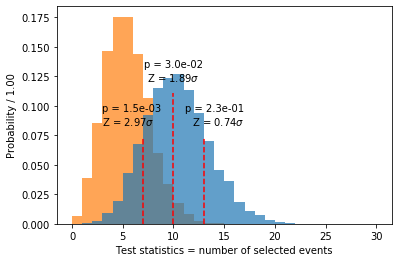

<IPython.core.display.Javascript object>

In [64]:
binning = [30, 0, 30]  # nbins, min, max

# just guess something
expected_numbers = {
    "nue": 5.1,
    "numu": 3.3,
    "dirt": 0.1,
    "dataext": 1.3,
    "data": 9,
    "nue_signal": 4.9,
    "nue_nonsignal": 0.2,
}

test_statistics_distribution_given_numbers(
    binning, expected_numbers, data_on=False, n_toy=10000, log=False
)

#### Data/MC comparison

MC category: $\nu_e$ CC other: 0.6 	#entries 59
MC category: $\nu_e$ CC 0$\pi$0p: 0.2 	#entries 20
MC category: $\nu_e$ CC 0$\pi$Np: 1.4 	#entries 131
MC category: $\nu_{\mu}$ CC other: 0.3 	#entries 31
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 0.9 	#entries 83
MC category: $\nu$ NC: 0.1 	#entries 12
MC category: $\nu$ NC $\pi^{0}$: 0.7 	#entries 69
MC category: Cosmic: 0.1 	#entries 13
MC category: Out of FV: 0.1 	#entries 10


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:268: RuntimeWarning: invalid value encountered in double_scalars
  sc_err = e / v


DRT: 0.034


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:292: RuntimeWarning: invalid value encountered in true_divide
  bins[-1] / val,
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:294: RuntimeWarning: invalid value encountered in true_divide
  yerr=err_on / val,


CPU times: user 3.43 s, sys: 111 ms, total: 3.55 s
Wall time: 2.16 s


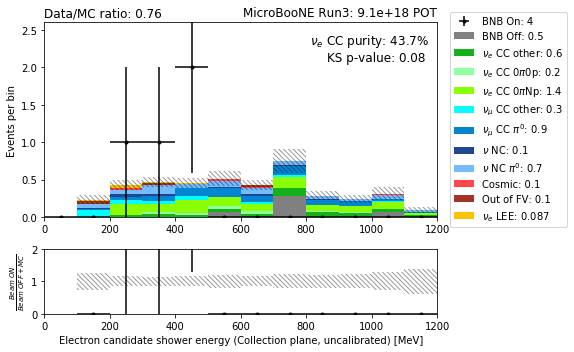

<IPython.core.display.Javascript object>

In [15]:
%%time
%autoreload
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(5 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio,purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "shr_energy_y_v",
    "Electron candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=12,
    x_min=0,
    x_max=1200,
    query=q_s,
    legend=True,
    title_str=title_str,
    kind="event_category",
    y_max_scaler=1.3
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_energy_y.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 2.8 	#entries 33
MC category: $\nu_e$ CC 0$\pi$0p: 1.1 	#entries 13
MC category: $\nu_e$ CC 0$\pi$Np: 7.2 	#entries 84
MC category: $\nu_{\mu}$ CC other: 0.9 	#entries 11
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 3.6 	#entries 42
MC category: $\nu$ NC: 0.5 	#entries 6
MC category: $\nu$ NC $\pi^{0}$: 3.3 	#entries 38
MC category: Cosmic: 1.0 	#entries 11
MC category: Out of FV: 0.5 	#entries 6


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 0.0
CPU times: user 2.74 s, sys: 95 ms, total: 2.84 s
Wall time: 1.8 s


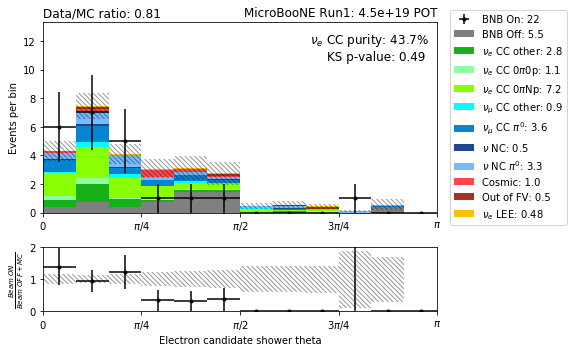

<IPython.core.display.Javascript object>

In [16]:
%%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(5 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio,purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "shr_tkfit_theta_v",
    "Electron candidate shower theta",
    N_bins=12,
    x_min=0,
    x_max=np.pi,
    query=q_s,
    legend=True,
    title_str=title_str,
    kind="event_category",
    y_max_scaler=1.9
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_labels)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_theta.pdf", bbox_inches="tight")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs
MC category: $\nu_e$ CC other: 11.7 	#entries 136
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 28
MC category: $\nu_e$ CC 0$\pi$Np: 13.5 	#entries 157
MC category: $\nu_{\mu}$ CC other: 374.4 	#entries 4344
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 491.2 	#entries 5723
MC category: $\nu$ NC: 33.1 	#entries 386
MC category: $\nu$ NC $\pi^{0}$: 192.7 	#entries 2244
MC category: Cosmic: 105.3 	#entries 1217
MC category: Out of FV: 69.2 	#entries 802


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 38.


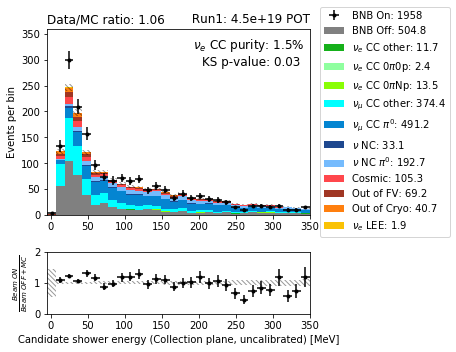

<IPython.core.display.Javascript object>

In [17]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "shr_energy_y_v",
    "Candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=30,
    x_min=-5,
    x_max=350,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_E.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 11.7 	#entries 136
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 28
MC category: $\nu_e$ CC 0$\pi$Np: 13.5 	#entries 157
MC category: $\nu_{\mu}$ CC other: 374.4 	#entries 4344
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 491.2 	#entries 5723
MC category: $\nu$ NC: 33.1 	#entries 386
MC category: $\nu$ NC $\pi^{0}$: 192.7 	#entries 2244
MC category: Cosmic: 105.3 	#entries 1217
MC category: Out of FV: 69.2 	#entries 802


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 41.
MC category: $\nu_e$ CC other: 11.7 	#entries 136
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 28
MC category: $\nu_e$ CC 0$\pi$Np: 13.5 	#entries 157
MC category: $\nu_{\mu}$ CC other: 374.4 	#entries 4344
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 491.2 	#entries 5723
MC category: $\nu$ NC: 33.1 	#entries 386
MC category: $\nu$ NC $\pi^{0}$: 192.7 	#entries 2244
MC category: Cosmic: 105.3 	#entries 1217
MC category: Out of FV: 69.2 	#entries 802
DRT: 41.
MC category: $\nu_e$ CC other: 11.7 	#entries 136
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 28
MC category: $\nu_e$ CC 0$\pi$Np: 13.5 	#entries 157
MC category: $\nu_{\mu}$ CC other: 374.4 	#entries 4344
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 491.2 	#entries 5723
MC category: $\nu$ NC: 33.1 	#entries 386
MC category: $\nu$ NC $\pi^{0}$: 192.7 	#entries 2244
MC category: Cosmic: 105.3 	#entries 1217
MC category: Out of FV: 69.2 	#entries 802
DRT: 41.


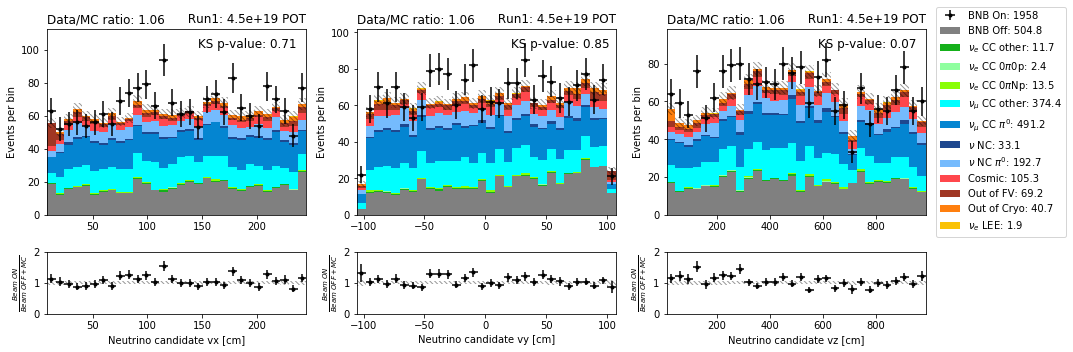

<IPython.core.display.Javascript object>

In [18]:
fig, ax = plt.subplots(
    ncols=3, nrows=2, figsize=(15, 5), gridspec_kw={"height_ratios": [3, 1]}
)


field_arr = ["reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z"]
lab_arr = [
    "Neutrino candidate vx [cm]",
    "Neutrino candidate vy [cm]",
    "Neutrino candidate vz [cm]",
]
x_min_arr = helper.lower + np.array([10, 10, 10])
x_max_arr = helper.upper - np.array([10, 10, 50])

for i, (x_min, x_max, lab, field) in enumerate(
    zip(x_min_arr, x_max_arr, lab_arr, field_arr)
):
    ratio, purity, ks_p = plothelp.plot_panel_data_mc(
        data,
        ax.T[i],
        field,
        lab,
        N_bins=30,
        x_min=x_min,
        x_max=x_max,
        query="e_candidate>0 & preselect",
        legend=(i == 2),
        title_str=title_str.split("NE")[-1],
        kind="event_category",
        y_max_scaler=1.2,
    )
    ax[0][i].text(
        ax[0][i].get_xlim()[1] * 0.98,
        ax[0][i].get_ylim()[1] * 0.9,
        "KS p-value: {0:<5.2f}".format(ks_p),
        horizontalalignment="right",
        fontsize=12,
    )

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_vtx.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 11.7 	#entries 136
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 28
MC category: $\nu_e$ CC 0$\pi$Np: 13.5 	#entries 157
MC category: $\nu_{\mu}$ CC other: 374.4 	#entries 4344
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 491.2 	#entries 5723
MC category: $\nu$ NC: 33.1 	#entries 386
MC category: $\nu$ NC $\pi^{0}$: 192.7 	#entries 2244
MC category: Cosmic: 105.3 	#entries 1217
MC category: Out of FV: 69.2 	#entries 802


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 41.
MC category: $\nu_e$ CC other: 11.7 	#entries 136
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 28
MC category: $\nu_e$ CC 0$\pi$Np: 13.5 	#entries 157
MC category: $\nu_{\mu}$ CC other: 374.4 	#entries 4344
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 491.2 	#entries 5723
MC category: $\nu$ NC: 33.1 	#entries 386
MC category: $\nu$ NC $\pi^{0}$: 192.7 	#entries 2244
MC category: Cosmic: 105.3 	#entries 1217
MC category: Out of FV: 69.2 	#entries 802
DRT: 41.


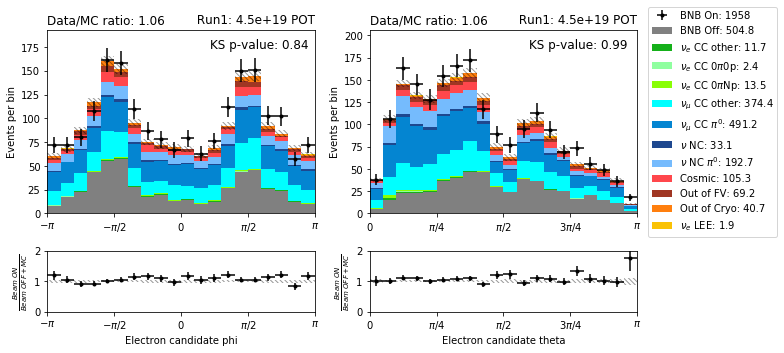

<IPython.core.display.Javascript object>

In [19]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "shr_tkfit_phi_v",
    "Electron candidate phi",
    N_bins=20,
    x_min=-np.pi,
    x_max=np.pi,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_xticklabels(x_labels)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_xticklabels(x_labels)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_theta_v",
    "Electron candidate theta",
    N_bins=20,
    x_min=0,
    x_max=np.pi,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1][1].set_xticks(x_ticks)
ax[1][1].set_xticklabels(x_labels)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_xticklabels(x_labels)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_angles.pdf", bbox_inches="tight")

MC category: $p$: 17.8 	#entries 207
MC category: $\mu$: 26.5 	#entries 305
MC category: $e$: 31.8 	#entries 370
MC category: $\pi^{\pm}$: 23.2 	#entries 270
MC category: $\gamma$: 682.2 	#entries 7947
MC category: $K$: 0.1 	#entries 1
MC category: Cosmic: 513.4 	#entries 5954


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 20.
MC category: $p$: 17.8 	#entries 207
MC category: $\mu$: 26.5 	#entries 305
MC category: $e$: 31.8 	#entries 370
MC category: $\pi^{\pm}$: 23.2 	#entries 270
MC category: $\gamma$: 682.2 	#entries 7947
MC category: $K$: 0.1 	#entries 1
MC category: Cosmic: 513.4 	#entries 5954
DRT: 33.


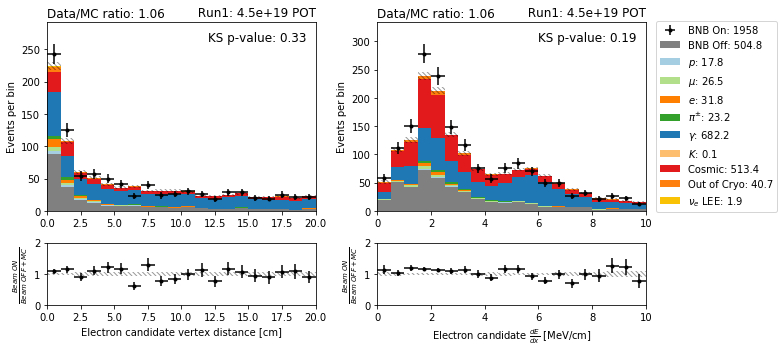

<IPython.core.display.Javascript object>

In [20]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "shr_dist_v",
    "Electron candidate vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=20,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_dedx_y_v",
    r"Electron candidate $\frac{dE}{dx}$ [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shwrfields.pdf", bbox_inches="tight")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
MC category: $p$: 17.8 	#entries 207
MC category: $\mu$: 26.5 	#entries 305
MC category: $e$: 31.8 	#entries 370
MC category: $\pi^{\pm}$: 23.2 	#entries 270
MC category: $\gamma$: 682.2 	#entries 7947
MC category: $K$: 0.1 	#entries 1
MC category: Cosmic: 513.4 	#entries 5954


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 41.


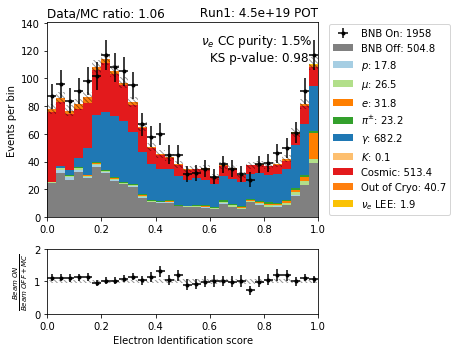

<IPython.core.display.Javascript object>

In [21]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "score",
    "Electron Identification score",
    N_bins=30,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_e_score.pdf", bbox_inches="tight")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
MC category: $p$: 961.2 	#entries 11192
MC category: $\mu$: 943.7 	#entries 10973
MC category: $e$: 32.3 	#entries 376
MC category: $\pi^{\pm}$: 330.7 	#entries 3851
MC category: $\gamma$: 792.5 	#entries 9232
MC category: $K$: 4.0 	#entries 46
MC category: Cosmic: 1058.5 	#entries 12316


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 77.


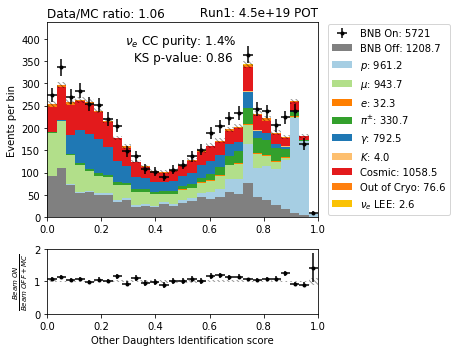

<IPython.core.display.Javascript object>

In [22]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "score",
    "Other Daughters Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.7,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_score.pdf", bbox_inches="tight")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.25 µs
MC category: $\nu_e$ CC other: 11.7 	#entries 136
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 28
MC category: $\nu_e$ CC 0$\pi$Np: 13.5 	#entries 157
MC category: $\nu_{\mu}$ CC other: 374.4 	#entries 4344
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 491.2 	#entries 5723
MC category: $\nu$ NC: 33.1 	#entries 386
MC category: $\nu$ NC $\pi^{0}$: 192.7 	#entries 2244
MC category: Cosmic: 105.3 	#entries 1217
MC category: Out of FV: 69.2 	#entries 802


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 41.


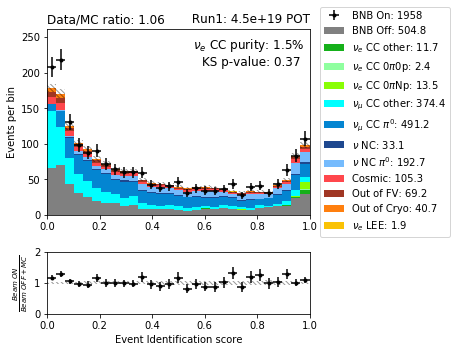

<IPython.core.display.Javascript object>

In [23]:
%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(4 * plothelp.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax,
    "score_event",
    "Event Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_event_score.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 2.8 	#entries 33
MC category: $\nu_e$ CC 0$\pi$0p: 1.1 	#entries 13
MC category: $\nu_e$ CC 0$\pi$Np: 7.2 	#entries 84
MC category: $\nu_{\mu}$ CC other: 0.9 	#entries 11
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 3.6 	#entries 42
MC category: $\nu$ NC: 0.5 	#entries 6
MC category: $\nu$ NC $\pi^{0}$: 3.3 	#entries 38
MC category: Cosmic: 1.0 	#entries 11
MC category: Out of FV: 0.5 	#entries 6


/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/helpplots.py:364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]


DRT: 0.0
MC category: $\nu_e$ CC other: 2.8 	#entries 33
MC category: $\nu_e$ CC 0$\pi$0p: 1.1 	#entries 13
MC category: $\nu_e$ CC 0$\pi$Np: 7.2 	#entries 84
MC category: $\nu_{\mu}$ CC other: 0.9 	#entries 11
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 3.6 	#entries 42
MC category: $\nu$ NC: 0.5 	#entries 6
MC category: $\nu$ NC $\pi^{0}$: 3.3 	#entries 38
MC category: Cosmic: 1.0 	#entries 11
MC category: Out of FV: 0.5 	#entries 6
DRT: 0.0


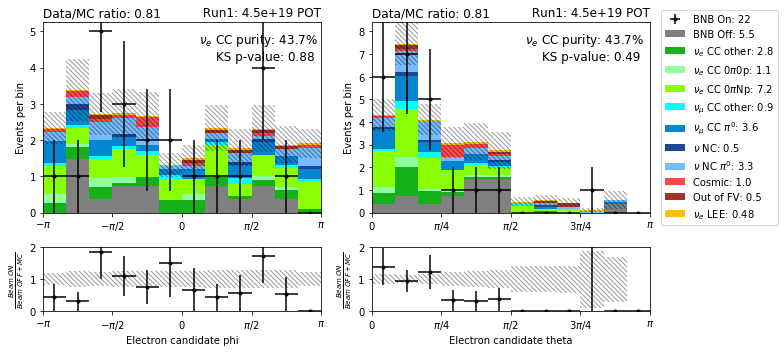

<IPython.core.display.Javascript object>

In [24]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[0],
    "shr_tkfit_phi_v",
    "Electron candidate phi",
    N_bins=12,
    x_min=-np.pi,
    x_max=np.pi,
    legend=False,
    query=q_s,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.05,
)
x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_xticklabels(x_labels)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_xticklabels(x_labels)

ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p = plothelp.plot_panel_data_mc(
    data,
    ax.T[1],
    "shr_tkfit_theta_v",
    "Electron candidate theta",
    N_bins=12,
    x_min=0,
    x_max=np.pi,
    legend=True,
    query=q_s,
    title_str=title_str.split("NE")[-1],
    kind="event_category",
    y_max_scaler=1.2,
)
x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1][1].set_xticks(x_ticks)
ax[1][1].set_xticklabels(x_labels)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_xticklabels(x_labels)

ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/after_angles.pdf", bbox_inches="tight")